# 7CUSMSDA Practical Week 6 :  Spatial Operation & Multivariate Regression
<a href="#This Week's Overview">This Week's Overview</a>

<a href="#Learn Outcomes">Learn Outcomes</a> 

<a href='#Get prepared'>Get prepared</a>

<a href='#Point Data'>Point Data</a>
  - <a href='#Aspatial inquiry and spatial visualization'>Aspatial inquiry and spatial visualization<a/>
  - <a href='#Measure distances between points'>Measure distances between points<a/>
    
<a href='#Linestring Data'>Linestring Data</a>
  - <a href='#Geo-location and spatial operation'>Geo-location and spatial operation<a/>
  - <a href='#Spatial relationships between point and line'>Spatial relationships between point and line<a/>
  - <a href='#Buffer'>Buffer<a/>
    
<a href='#Polygon Data'>Polygon Data</a>

<a href='#Spatial relationships and operations'>Spatial relationships and operations<a/>
  - <a href='#Intersections'>Intersections<a/>
  - <a href='#Difference'>Difference<a/>
  - <a href='#Union and Cascaded Union'>Union and Cascaded Union<a/>

<a href='#Get stations and railways within City of London'>Get stations and railways within City of London</a>
  - <a href='#Clip stations within city of london'>Clip stations within city of london<a/>
  - <a href='#Clip railways within City of London'>Clip railways within City of London<a/>
  - <a href='#Join the spatial data'>Join the spatial data<a/>


<a href='#Aspatial Multivariate Regression'>Aspatial Multivariate Regression<a/>
  - <a href='#Get data prepared'>Get data prepared<a/>
  - <a href='#Multivariate Regression'>Multivariate Regression<a/>
  - <a href='#Regression diagnostics'>Regression diagnostics<a/>
    - <a href='#Partial Regression Plots'>Partial Regression Plots<a/>
    - <a href='#Influence Plots'>Influence Plots<a/>
    - <a href='#Leverage-Resid2 Plot'>Leverage-Resid2 Plot<a/>

- <a href='#Task 1'>Task 1<a/>
- <a href='#Task 2'>Task 2<a/>
- <a href='#Task 3'>Task 3<a/>
- <a href='#Task 4'>Task 4<a/>
- <a href='#Task 5'>Task 5<a/>
- <a href='#Task 6'>Task 6<a/>
- <a href='#Task 7'>Task 7<a/>
- <a href='#Task 8'>Task 8<a/>
- <a href='#Task 9'>Task 9<a/>
- <a href='#Task 10'>Task 10<a/>


# <a id="This Week's Overview">This Week's Overview</a>

In this practical, besides of the `GeoPandas` introduced in previous weeks, we are going to practice the skills using [Shapely](https://pypi.org/project/Shapely/) in `PyPI`, for manipulation and analysis of planar geometric objects. You may want to explore its functions through [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html) on adding the functionality to work with planar geometric features, including the creation and manipulation of geometries such as points, polylines, and polygons; get familiar with topology on proximity (including adjacency, connectivity and containment) relationships, as well as spatial analysis functions, e.g.intersection, union, dissolve, etc.

It is based on the widely deployed [GEOS](https://trac.osgeo.org/geos/) library (the engine of [PostGIS](http://postgis.refractions.net)) and Java Topology Suite  (JTS) (from which GEOS is ported) libraries. GEOS implements the OpenGIS Simple Features for SQL spatial predicate functions and spatial operators. `Shapely` is not concerned with data formats or coordinate systems, but can be readily integrated with other packages. It provides spatial analysis methods that return new geometric objects. To complete the first section on spatial operation, we will use the following datasets: London stations as Point data, London railways as Polyline data and London LSOAs as Polygon data.

The second section is aspatial multivariate regression, trying to recall your knowledge on regression, and prepare for the spatial regression next week. For this section, we will reuse the London Airbnb listings data for realization.

# <a id="Learn Outcomes">Learn Outcomes</a>
In previous practicals, we had introduced main geometric objects, the spatial operations and queries on them, as well as the ways to measure distance and proximity (produce buffers), and tessellate space (Voronoi diagrams). By the end of this practical, you should be able to
- Gain familiarity with core geometric types (Point, LineString, Polygon, and their collection types)
- Make spatial and aspatial inqueries
- Identify spatial relationships 
- Conduct spatial operations to visualize multi-layers 
- Conduct aspatial multivariate regression for research purpose

# <a id="Get prepared">Get prepared</a>

In [1]:
import numpy as np
import pysal
from pysal.lib.cg import shapely_ext
import scipy.spatial as spatial
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import shapely.geometry
from shapely.geometry import Point
import matplotlib as mpl
import matplotlib.path as path
import matplotlib.pyplot as plt
%matplotlib inline

import os
import urllib
import zipfile

import warnings
warnings.simplefilter('ignore')

Basic geometric types
------------------------------
For Geospatial vector data in Python, they normally have geometric features, and the 3 fundemental geometric types of objects are:
- Point data: represents a single point in space.
- Polyline data ("LineString"): represents a sequence of points that form a line.
- Polygon data: represents a filled area.

Each of them can be combined in [multi-part geometries](https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects) for extensive overview.

## <a id="Point Data">Point Data</a>

Our first primitive geometry type is **Point**, by importing from shapely's `geometry` module. Let's start with a simple customized 2D point example:

In [2]:
from shapely.geometry import Point

point_test=Point(1,1)
type(point_test)

shapely.geometry.point.Point

We defined ($x$,$y$) for point_test as (1,1), by calling the `type` function, we can get its type as `shapely.geometry.point.Point`. For geospatial data, we normally define its geometry by latitude and longitude coordinates. So let's have a look of the london stations data saved as a .shp file last week.

In [3]:
stations=gpd.read_file("data/stations.shp")
stations.geometry.head()

0     POINT (0.00531 51.53187)
1    POINT (-0.26157 51.50822)
2    POINT (-0.27843 51.50214)
3    POINT (-0.03128 51.35571)
4    POINT (-0.07163 51.37934)
Name: geometry, dtype: geometry

From the checking on geometry, we can find that the data had already been set as Point as we expected. Do you still remember the code we've used to set up the geometry last week? When we saved the stations .csv file into .shp file, we had called `Shapely.geometry.Point`, which is exactly what we received above. 

In [5]:
# Plot map
fig, ax = plt.subplots(1,
                       figsize = (8,5),
                       dpi = 72,
                       facecolor = 'white')

ax.set_position([0,0,1,1])   # Puts axis to edge of figure
ax.set_axis_on()            # Turns axis on
# If you want the facecolour applies to axis area as well as bit around the outside
# you may choose to turn the axis off
ax.get_xaxis().set_visible(False)   # Turns the x axis off so that 'invisible' axis labels don't take up space
ax.get_yaxis().set_visible(False)
lims = plt.axis('equal')
stations.plot(ax=ax)
plt.show()

### <a id="Aspatial inquiry and spatial visualization">Aspatial inquiry and spatial visualization<a/>
It is common to conduct aspatial inquiries when dealing with your own data. So let's start with finding the stations within Zone 1:
1. Locate the stations within london transportation Zone 1 and get it plotted as map for information.
2. Save stations in Zone 1 as a new shapefile.
3. Get ideas on the differences between these two shapefiles' point features by calling `Shapely.MultiPoint`.

In [4]:
stations['zonename']=np.where(stations['Zone']==1,'zone1','out of zone 1')
stations.head()

,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y,geometry,zonename
0,291,477,Abbey Road,539077,183399,None,DLR,3,0.005308,51.531865,POINT (0.00531 51.53187),out of zone 1
1,258,162,Acton Central,520632,180296,None,London Overground,3,-0.261566,51.508218,POINT (-0.26157 51.50822),out of zone 1
2,225,204,Acton Town,519478,179592,"District, Piccadilly",London Underground,3,-0.278433,51.502137,POINT (-0.27843 51.50214),out of zone 1
3,455,421,Addington Village,537066,163744,None,Tramlink,6,-0.031284,51.355710,POINT (-0.03128 51.35571),out of zone 1
4,422,425,Addiscombe,534188,166297,None,Tramlink,5,-0.071626,51.379342,POINT (-0.07163 51.37934),out of zone 1


`numpy.where` function can help to define our targeted area "zone value <=1" with a new value "zone1" under new column "zonename", while the remaining stations will be valued as "out of zone 1". To highlight the difference, we will use different colors to plot them:

In [16]:
pointsPalette = {'zone1': 'orange', 'out of zone 1': 'lightblue'}

fig, ax = plt.subplots(1,
                       figsize = (8,6),
                       dpi = 72,
                       facecolor = 'white')

for ctype, data in stations.groupby('zonename'):
    color = pointsPalette[ctype]
    label = ctype 
    data.plot(color=color,
              ax=ax,
              label=label,
              markersize=30)
ax.set_position([0,0,1,1])   # Puts axis to edge of figure
ax.set_axis_on() 
ax.get_xaxis().set_visible(False)   
ax.get_yaxis().set_visible(False)
lims = plt.axis('equal')
ax.set(title='Distribution of underground and overground stations in Central London')
ax.legend(fontsize=10,
          frameon=True,
          loc=(.8, .8),
          title="LEGEND")
plt.show()

### <a id="Task 1">Task 1<a/> 
Can you get the number of stations within Zone 1? You should get an answer around 60. Then please save these points into your directory as `stations_zone1.shp`, with CRS at EPSG: 4326.

In [5]:
# your code here
st_zone1 = stations[stations['zonename'] == 'zone1']
print (len(st_zone1))

69


In [21]:
# your code here
st_zone1.to_file('data/stations_zone1.shp')

Similarly, you may want to repeat these steps to get stations within Zone 3 or out of Zone 3. Feel free to have a try when you complete this whole practical. But now, let's continue to explore the newly generated data: list the coordinates information for these 60 stations in Zone 1. There are 2 ways to get the list, quite similar to each other.

In [6]:
# check output format for column geometry 
st_zone1.geometry

5      POINT (-0.07424 51.51398)
6      POINT (-0.06954 51.51492)
12     POINT (-0.10312 51.53098)
18     POINT (-0.15545 51.52249)
20     POINT (-0.08730 51.51292)
                 ...            
410    POINT (-0.07491 51.50943)
423    POINT (-0.14149 51.49589)
434    POINT (-0.13674 51.52402)
436    POINT (-0.11282 51.50291)
460    POINT (-0.12405 51.50045)
Name: geometry, Length: 69, dtype: geometry

In [7]:
# create a new column Coordinates as a tuple of Longitude and Latitude
st_zone1['coordinates'] = list(zip(st_zone1['x'], st_zone1['y']))
# we transform tuples to Point
coords = st_zone1['coordinates'].apply(Point)
coords

5      POINT (-0.07423630000000001 51.51398203)
6              POINT (-0.069540402 51.51491653)
12              POINT (-0.103116359 51.5309796)
18             POINT (-0.155454387 51.52249387)
20              POINT (-0.08729695 51.51291511)
                         ...                   
410    POINT (-0.07491386899999999 51.50943419)
423            POINT (-0.141485017 51.49588954)
434            POINT (-0.136735811 51.52401887)
436            POINT (-0.112818812 51.50291418)
460            POINT (-0.124052209 51.50045311)
Name: coordinates, Length: 69, dtype: object

As the geometry takes format as POINT (longitude, latitude), we can use it to draw a bounding polygon for stations within zone 1 by calling Shapely's `MultiPoint`. The methods could be either `convex hull` or `envelope` as introduced in previous weeks. Try to explore both datasets and methods, and identify their differences.

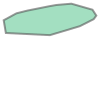

In [8]:
from shapely.geometry import MultiPoint
# the geometry for stations within zone 1 is a list of (longitude, latitude) tuples
geometry_zone1 = list(st_zone1['coordinates'])
# the convex hull of this set of 60 points is like an elastic band stretched around the geometry
zone1hull = MultiPoint(geometry_zone1).convex_hull
zone1hull

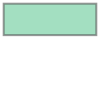

In [35]:
# The envelope is the point or smallest rectangular polygon (with sides parallel to the coordinate axes) 
# that contains the geometry
zone1enve = MultiPoint(geometry_zone1).envelope
zone1enve

The coordinates of the envelope polygon above could be derived by calling bounding box `bounds` from `MultiPoint`. The bounding box is a (minx, miny, maxx, maxy) tuple.

In [36]:
zone1bounds = MultiPoint(geometry_zone1).bounds
zone1bounds

(-0.194491212, 51.48856954, -0.069540402, 51.5309796)

### <a id="Task 2">Task 2<a/>
Please get your codes to work out the convex hull, envelope and coordinates of bounds for all stations point data. Then try to compare the results. Your codes below:

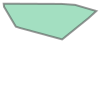

In [37]:
# the geometry for all stations 
geometry_st = list(zip(stations['x'], stations['y']))
stationhull = MultiPoint(geometry_st).convex_hull
stationhull

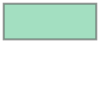

In [40]:
zoneenve = MultiPoint(geometry_st).envelope
zoneenve

In [42]:
# compare the total stations' bounds
# your code here
stabounds = MultiPoint(geometry_st).bounds
stabounds 

(-0.609421076, 51.34195708, 0.331671253, 51.70474175)

### <a id='Measure distances between points'>Measure distances between points<a/>

In real society, it is often to measure the distances between two targeted observations, say point data. So we will call `Shapely` to measure the distances in different ways: e.g., Euclidean distance, Manhattan distance, Shortest-path distance and Travel-time distance. In this practical, we will use the common Euclidean distance introduced in lecture, to measure the distances between named stations within Zone 1 (**Westminster, Holborn, Bank**) as example. 

The primary idea is to get their coordinates from their longitude and latitude information. However, please keep in mind that the measurement unit should be **meters**, so we need to turn their `CRS` into National Grid Coordinates EPSG:27700 as the starting point.

### <a id="Task 3">Task 3<a/>
1. Reproject the **crs** for stations in Zone 1 data to EPSG 27700;
2. Print out the **geometry** for targeted 3 stations. **Hint**: find the specific "name" from dataframe, then print out the geometry information for the dataframe.

In [9]:
# your code here
st_zone1 = st_zone1.to_crs(epsg=27700)
st_s = st_zone1[st_zone1['NAME'].isin(['Westminster', 'Holborn', 'Bank'])]
st_s

,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y,geometry,zonename,coordinates
20,35,47,Bank,532710,181120,"Waterloo & City, Northern, Central",London Underground,1,-0.087297,51.512915,POINT (532823.429 181066.068),zone1,"(-0.08729695, 51.51291511)"
205,37,49,Holborn,530512,181525,"Central, Piccadilly",London Underground,1,-0.118809,51.517069,POINT (530625.062 181471.296),zone1,"(-0.1188087, 51.51706879)"
460,42,195,Westminster,530196,179668,"District, Circle, Jubilee",London Underground,1,-0.124052,51.500453,POINT (530308.626 179614.237),zone1,"(-0.124052209, 51.50045311)"


In [92]:
# your code here
print (st_s['geometry'])

20     POINT (532823.432 181066.067)
205    POINT (530625.065 181471.295)
460    POINT (530308.629 179614.236)
Name: geometry, dtype: geometry


Once you complete Task 3, we can define their coordinates to points, and get a rough idea of their relative distribution.

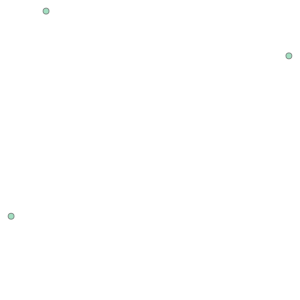

In [18]:
# measure their distance using shapely
from shapely.geometry import Point
p1=Point(530308.629, 179614.236) # Westminster
p2=Point(530625.065, 181471.295) # Holborn
p3=Point(532823.432, 181066.067) # Bank
mp=MultiPoint([p1, p2, p3])
mp

To measure the distances between them, we can simply call shapely's `distance` function.  

In [94]:
# minimum distance from p1 to p2
print("Distance between Westminster and Holborn is: "+str("%.2f"%p1.distance(p2))+" meters") 
# you may swap p1 and p2, see whether any difference
# minimum distance from p2 to p3
print("Distance between Holborn and Bank is: "+str("%.2f"%p2.distance(p3))+" meters")
# minimum distance from p1 to p3
print("Distance between Westminster and Bank is: "+str("%.2f"%p1.distance(p3))+" meters")

Distance between Westminster and Holborn is: 0.02 meters
Distance between Holborn and Bank is: 0.03 meters
Distance between Westminster and Bank is: 0.04 meters


It returns the minimum distance in float format, and there is also `hausdorff_distance` returning to the furthest distance. However, for our listed 3 points the results are the same, you are encouraged to replace the `distance` function with `hausdorff_distance` for comparison if interested; you are also welcome to choose other stations for calculation if any interest.

## <a id='Linestring Data'>Linestring Data</a>
The second geometric type is **Polyline**, and defined as Linestring in Shapely by calling its `LineString` function. We will use the London Railways data for this section to get familiar with linestring's features. The data is available for downloading from OpenStreetMap as a shapefile data; to save time, I've already prepared it as zipfile in Github, so we should firstly read the London railways data into a geopandas DataFrame, and have a look of the features.

In [61]:
# Configure the download
url  = 'https://github.com/cusp-london/Spatial-Data-Analysis/blob/master/railways.zip?raw=True'
path = os.path.join("data","railways.zip")

# Download
r    = urllib.request.urlretrieve(url, path)

# Unzip it into the data folder
z    = zipfile.ZipFile(path)
m    = z.extractall("data")

In [10]:
railways = gpd.read_file('data/railways/gis_osm_railways.shp')
railways.plot(figsize=(10,8))

### <a id="Task 4">Task 4<a/>
Write your codes below to answer questions on: 
1. The geometric type for railways.
2. How many polylines in this dataset?

In [66]:
# your code here
railways.geometry.head()

0    LINESTRING (0.00486 51.62793, 0.00620 51.62927...
1    LINESTRING (-0.22496 51.49354, -0.22507 51.494...
2    LINESTRING (-0.20555 51.51954, -0.20514 51.519...
3    LINESTRING (-0.20407 51.52214, -0.20462 51.522...
4    LINESTRING (-0.18626 51.61591, -0.18687 51.61384)
Name: geometry, dtype: geometry

In [67]:
# your code here
print (len(railways.geometry))

12118


From the outputs you got, we can tell that there are 12118 polylines, all of which are geometrically Linestring. 
Before we conduct any spatial operations between different datasets, it is good practice to check their **crs** information. Although we had already checked the **crs** for london stations point data, we need to keep other spatial layers (polyline or polygon) consistent with each other. So let's check the .crs attribute for railways data as well.

In [68]:
railways.crs

{'init': 'epsg:4326'}

You may reach at a WGS84 (EPSG: 4326) crs for the railways data, and we need to set it to OSGB 1936(EPSG:27700) to match the stations data. So let's get the new geometry set:

In [11]:
new_railways=railways.to_crs(epsg=27700) # reproject
new_railways.plot() # check the difference between 2 plots with varied CRS

You will find the railway map has been stretched vertically from the view, and now it is ready to be used for distance meansurement as well. Now let's explore the spatial relationships between points and polylines:

### <a id="Geo-location and spatial operation">Geo-location and spatial operation<a/>
    
In this section, we want to select a specific railway line in London, preferrably a line we are familiar with; to find out the spatial relationships between this line and selected points (stations in real society); and measure the distance from point to the line, if the point is not on it. So we need to set up following goals to realize step by step:
1. Find the **Circle lines** and save them together by selecting data calling `loc`.
2. Locate a specific sub-line in **circle lines** by calling `iloc`.
3. Get the geometric features for selected line, e.g. **length, bounds, buffer**.
4. Explore the spatial relationship between point and linestring by calling `within` and `contains`.
5. Measure the distance from a point to the linestring.

Furthermore, if you go back to check the headers for railways data, you will find a `name` column with the searching keywords we are interested (They are: 'Circle line','Circle/District Line' and 'Circle and District Lines'). In order to make it easier to select data by label or by a conditional statment (`.loc`), we can reset the index for each polyline with `name`. 

In [12]:
# we are going to search by name, so set name as the index
new_railways.set_index('name', inplace=True)
new_railways.head()

,osm_id,code,fclass,geometry
name,,,,
Lea Valley Lines,30804,6101,rail,"LINESTRING (538867.468 194026.756, 538955.671 ..."
Hammersmith and City Line,101298,6103,subway,"LINESTRING (523323.407 178671.296, 523314.881 ..."
Hammersmith and City Line,101486,6103,subway,"LINESTRING (524600.153 181595.290, 524627.821 ..."
Great Western Main Line,101511,6101,rail,"LINESTRING (524695.883 181886.856, 524657.261 ..."
Northern Line (High Barnet Branch),282898,6103,subway,"LINESTRING (525672.734 192344.626, 525635.969 ..."


In [13]:
circleline=new_railways.loc[['Circle line','Circle/District Line', 'Circle and District Lines']]
circleline.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 117 entries, Circle line to Circle and District Lines
Data columns (total 4 columns):
osm_id      117 non-null object
code        117 non-null int64
fclass      117 non-null object
geometry    117 non-null geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 4.6+ KB


117 polylines have been selected based on our searching criterion, and combined into a new dataframe "circleline". For specific linestring, if we want to get more detailed information on its geometric coordinates, we can call `list` function to realize it. So in order to select a linestring object, we can use its row number by calling `iloc`; here I designedly choose the line at "74" (you will figure out my intention later), and we can get the points coordinates by calling `coords` as below:

In [72]:
# get the coordinates information on specific polyline
list(circleline.geometry.iloc[74].coords)

[(530428.0074790482, 180413.62381644384),
 (530411.1982466972, 180376.18195359968),
 (530397.0032235021, 180344.56021560577),
 (530379.2209069991, 180274.64529610798),
 (530371.9918020066, 180229.70448672207),
 (530359.5922412437, 180162.43145132513),
 (530350.0843889426, 180104.51306821645),
 (530346.4988183748, 180071.82826697844),
 (530340.3595443233, 180026.33684885327),
 (530313.7082672049, 179845.00756705605),
 (530306.1320168389, 179804.3421753893),
 (530297.7263252948, 179779.2342295017),
 (530282.1126631077, 179751.64929959673),
 (530261.5132050588, 179726.7408450343),
 (530225.9123594079, 179690.44300068263),
 (530180.0387492746, 179656.06340498675)]

How many points have been used to define this line? You can count it from the output (if you like), or call another method `len` to get the count directly.

In [15]:
len(circleline.geometry.iloc[74].coords) # measure the points building up this line

16

YES, you are right, `len` and `length` are different! For polylines, `len` counts the number of points to define linestring, and for this polyline, there are 16 points. However, it is not a fixed number, and the number of points to define a linestring varies. Try any other rows, to see the variations of points counts. Further step, let's try to call `length` to see what we will get:

In [74]:
circleline.geometry.iloc[74].length # measure the length of the railway line

822.556923061196

As we know the 16 points used to define specific section of circle line, we use their coordinates to define a new LineString named as circleline_74.

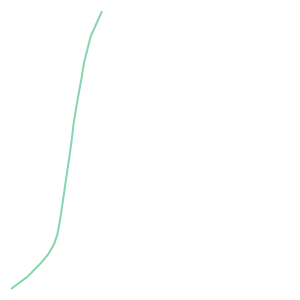

In [16]:
from shapely.geometry import LineString

circleline_74=LineString([(530428.0074790481, 180413.6238164446),
 (530411.1982466972, 180376.18195359968),
 (530397.0032235021, 180344.56021560577),
 (530379.2209069991, 180274.64529610798),
 (530371.9918020066, 180229.70448672207),
 (530359.5922412437, 180162.43145132443),
 (530350.0843889426, 180104.51306821714),
 (530346.4988183748, 180071.82826697844),
 (530340.3595443233, 180026.33684885327),
 (530313.7082672049, 179845.00756705605),
 (530306.1320168389, 179804.34217539),
 (530297.7263252948, 179779.2342295017),
 (530282.1126631077, 179751.64929959673),
 (530261.5132050588, 179726.7408450343),
 (530225.912359408, 179690.44300068187),
 (530180.0387492746, 179656.06340498675)])
circleline_74

Upon the plotting of this polyline, we can call `.bounds` method to get the coordinates for its bounding boxes, which are the coordinates for the left-bottom and right-top.

In [76]:
circleline_74.bounds

(530180.0387492746, 179656.06340498675, 530428.0074790481, 180413.6238164446)

### <a id="Spatial relationships between point and line">Spatial relationships between point and line<a/>

If you try to google the coordinates for 3 selected stations and the sub-section of circle line, you may find the Westminster station (point $p1$) should be on this line; so let's check it by calling either `within` or `contain`. Think of their relationship, it should be line contain point and point within line.

In [19]:
# check whether point is within the line
p1.within(circleline_74)

False

In [102]:
# check whether the line contains the point
circleline_74.contains(p1)

False

So far, from the boolean results, both return **False**, indicating a not contain/within relationship between the point and polyline. But you know it is not the truth, so what is the problem? Discuss with your neighbors about it. 

Before we work out the solution, there is a roundabout to find the reason...........measure the distance between point and line!

In [104]:
p1.distance(circleline_74)

112.41532473079273

It seems that the station is 112.4 meters away from the line, emmmmm, reasonable. So reflecting from the reality, it could be systematic error generated when collecting the original data; or the measuring of coordinates take different centroid/center point. So a commonly used way to fix this could be use `buffer` function.
### <a id="Buffer">Buffer<a/>
A buffer is a geometry with an envelope at a given distance from the object's envelope. So let's create a 120 metres (slightly larger than 112.4 meters) buffer zone for the named railway line. 

In [20]:
# Create buffer of 10 metres on the linestring geometry
circleline_74_buf=circleline_74.buffer(120)

The coordinates for boundings for the buffered zone are also derivable by `bounds`.

In [106]:
circleline_74_buf.bounds

(530060.155311603, 179536.1799673152, 530547.956061778, 180533.57239917456)

Let's check the type of newly generated buffer data.

In [107]:
type(circleline_74_buf)

shapely.geometry.polygon.Polygon

It is no longer Linestring, and now become Polygon. If we try to plot both the linestring and its buffer:

In [108]:
import descartes
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(circleline_74_buf, fc='r', ec='b', alpha=0.4)) # buffer area in red with 40% transparency
ax.add_patch(descartes.PolygonPatch(circleline_74.buffer(0.2))) # original linestring in black in the center
minx, miny, maxx, maxy = circleline_74_buf.bounds
ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
ax.set_aspect('auto') # normally use 'equal', here emphasing the buffering
plt.show()

Buffering helps us to widen the railway line by 10 meters, and we will further check whether the point locates within the buffered zone. So complete the following task by yourself.
### <a id="Task 5">Task 5<a/>
1. Test whether Westminster station is in the buffered zone of selected section for circle line.
2. Test whether the other point, Bank station, locates in the buffered zone for this line.

If you receive a **True** output, then try to interpret the result: 
It means ------------ station is ------------ line. 

If you receive a **False** output, then further work out how far away from the line:
------------ station is ------------ meters away from the specified circle line section.

In [109]:
# your code here
p1.within(circleline_74_buf)

True

In [111]:
# your code here
p3.within(circleline_74_buf)  # Bank

False

In [112]:
# your code here
p3.distance(circleline_74)

2482.688209047946

## <a id="Polygon Data">Polygon Data<a/>

Thus far we have encountered two types of geometries for shapefiles, namely **Point** and **Linestring**, and now we will recap on the most familiar third type, **Polygon**, with London LSOA data as the example, copy the data from Week 1 into this week's data folder.

In [21]:
from shapely.geometry import Polygon
lsoas=gpd.read_file('data/LSOA_IMD2019.shp')
lsoas.plot()

As you are familiar with Geodataframe, I leave it to you to get the information on data features by completing Task 6.
### <a id="Task 6">Task 6<a/>
1. This is a polygon, please check the geometry for polygon and its **crs**.
2. Try to measure the area and length of London LSOAs as polygon data. 
3. Get the coordinates of bounding box for London LSOAs.

In [115]:
# your code here
lsoas.geometry.head()

0    POLYGON ((532095.563 181577.351, 532095.125 18...
1    POLYGON ((532267.728 181643.781, 532262.875 18...
2    POLYGON ((532105.312 182010.574, 532104.872 18...
3    POLYGON ((533610.974 181410.968, 533615.622 18...
4    POLYGON ((544817.826 184346.261, 544815.791 18...
Name: geometry, dtype: geometry

In [116]:
# your code here
lsoas.crs

{'init': 'epsg:27700'}

In [123]:
# your code here
print ("Area:", lsoas.area)
print ("Length: ", lsoas.length)

Area: 1573009131.177406
Length:  0       2635.781429
1       2708.052040
2       1224.770897
3       2275.832056
4       1966.162225
           ...     
4941    1916.462524
4942    5329.417389
4943    2221.028038
4944    4260.442206
4945    2602.577430
Length: 4946, dtype: float64


In [124]:
# your code here
lsoas.bounds

,minx,miny,maxx,maxy
0,531936.688,181262.547,532308.875,182011.969
1,532213.064,181184.875,532746.813,182003.600
2,532056.688,181864.500,532421.965,182198.400
3,533319.188,180733.859,533842.750,181591.156
4,544691.522,184120.609,545296.313,184604.871
...,...,...,...,...
4941,544201.772,179383.681,544804.875,179827.300
4942,545121.476,179998.296,546689.571,181097.813
4943,544228.618,179025.000,544775.294,179581.888
4944,545647.724,179362.113,546561.999,180701.646


What have you got? They should be 4946 measures for lsoa's area and length respectively. 

Since you've get your task done, let's have the 3 datasets plotted together for visualization.

In [22]:
# Plot three layers in London together
stations=gpd.read_file('data/stations.shp')
new_stations=stations.to_crs(epsg=27700)

ax = lsoas.plot(edgecolor='lightblue', facecolor='none', figsize=(10, 8))
new_railways.plot(ax=ax, color='grey')
new_stations.plot(ax=ax, color='red', alpha=0.5)
ax.set(xlim=(500000, 560000), ylim=(160000, 200000))

## [<a id="Spatial relationships and operations">Spatial relationships and operations</a>](https://en.wikipedia.org/wiki/Spatial_relation)

Geospatial data normally have their spatial relationships, e.g. overlap, intersect, contain, ..., etc., to describe how two or more spatial objects relate to each other. We had tried to explore the relationship between point and polyline about `contains` and `within`, and we will further explore their relationships with polygon.

<img  height="100" src="TopologicSpatialRelations2.png">

### <a id="Intersections">Intersections<a/>
The spatial intersection relationship happens between polygons, but we are going to practice it simply with our defined three points and their buffers. As you might notice the distances among these points, we will define a 1000 meters' buffer for test. In addition, the library `decartes` will be used to facilitate visualization of these operations:

In [23]:
from shapely.geometry import MultiPolygon
poly_1=p1.buffer(1000)
poly_2=p2.buffer(1000)
poly_3=p3.buffer(1000)
mp_buf = MultiPolygon((poly_1, poly_2, poly_3))

In [129]:
import descartes
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(poly_1, fc='b', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(poly_2, fc='g', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(poly_3, fc='r', ec='k', alpha=0.2))
minx, miny, maxx, maxy = mp_buf.bounds
ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
ax.set_aspect('equal')
plt.show()

In [130]:
# Testing the relationships 
poly_1.intersects(poly_2)

True

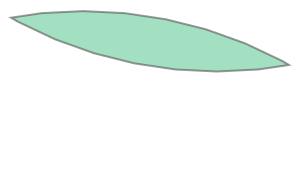

In [131]:
# Getting the object from this relationship 
int_1_2 = poly_1.intersection(poly_2)
int_1_2

The buffered polygon for $p1$ (blue) and $p2$ (green) are intersecting with each other, and. we plot out the object for intersected part. Now you may want to test the relationship between $p1$ and $p3$ by yourself.
### <a id="Task 7">Task 7<a/>

In [134]:
# Testing the relationships between poly_1 and poly_3
# your code here
poly_1.intersects(poly_3)

False

In [135]:
# Getting the object from this relationship 
# your code here
int_1_3 = poly_1.intersection(poly_3)
int_1_3

`Intersection` focuses on the shared part(s) between two polygons, but how if we want to find their differences?
### <a id="Difference">Difference<a/>
As the 1000 metres' buffer zone for Point $p1$ and Point $p2$ intersect with each other, we will continue with this data for `Difference` operation:

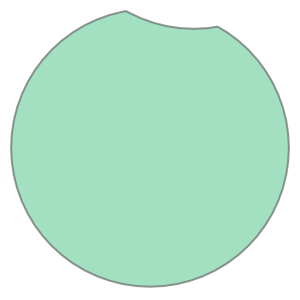

In [136]:
# the difference part in poly_1 from poly_2
poly_1.difference(poly_2)

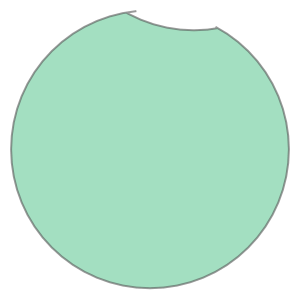

In [137]:
# difference between poly_1 and intersection part int_1_2
poly_1.difference(int_1_2)

You will find this is actually the buffered zone of $p1$, without its shared part with $p2$. The slight difference between these 2 outputs will be the outline of shared part. We could also do it in the other way:

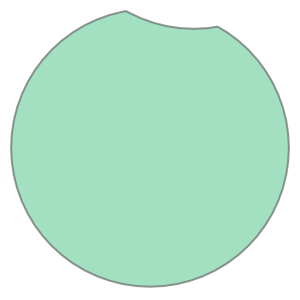

In [148]:
# your code here
poly_1.union(poly_2).difference(poly_2)

Both `intersection` and `difference` are kind of "subtraction", how about "addition"?
### <a id="Union and Cascaded Union">Union and Cascaded Union<a/>    
If we want to get the "addition" of two objects, we may call `union` in `shapely`.

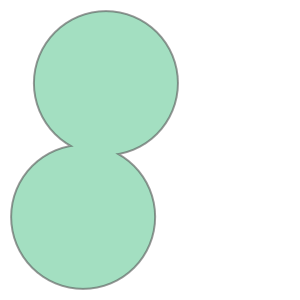

In [144]:
u_1_2 = poly_1.union(poly_2)
u_1_2

### <a id='Task 8'>Task 8<a/>
Once you've understood the rationale of these 3 spatial operations, try to complete this task by yourself.
- Union the difference part in poly_1 from poly_2, and the difference part in poly_2 from poly_1. 
- Further test the containment of point (531000, 180100) from your output of union.

In [156]:
# your code here = 
d_1_2 = poly_1.difference(poly_2)
d_2_1 = poly_2.difference(poly_1)
p_test = Point(531000, 180100)
u_int_1_2 = d_1_2.union(d_2_1)
p_test.within(u_int_1_2)

True

You've got your outputs so far, however, if we change the method for union into `cascaded_union`, the results will vary. Try google the differences between these two union methods and discuss with your neighbors.

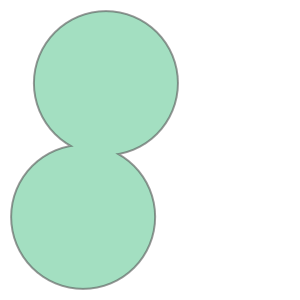

In [153]:
from shapely.ops import cascaded_union
cu = cascaded_union([d_1_2, d_2_1, int_1_2])
cu

Have you spotted out, which element is the crucial reason for the different union outputs? Why?

In [157]:
# test the containment of test point again
cu.contains(p_test)

True

Once you are happy with these operations on three main types of vector data. Let's define a specific region, which is City of London, and get the stations and railways within the area "cut" out.

## <a id='Get stations and railways within City of London'>Get stations and railways within City of London<a/>
To select only the railways within City of London, we could take several approaches. We have the lsoa layer for 4946 polygons, as well as the railway network layer for London with 12118 segments. We could then use the intersects method for each lsoa to test if it intersects with a particular segment of the railway network, and keep all the segments where we find an intersection with the lsoa.

Although this would work, it turns out to be very inefficient requiring we compare each lsoas against each railway segments and test for an intersection. If we think about our problem from a slightly different perspective, we know that if we find a segment that intersects with a lsoa within **city_ldn**, it must, by definition, intersect with the polygon, if we had such a thing. This would substantially reduce the number of intersection tests we need to conduct. We now only need compare 1 polygon against each of the railway segments. Great.

Before we start our computation, there is still one crucial thing to be solved: we do not yet have the magical **city_ldn** polygon, and this could be got by calling `Dissolve`.

In [24]:
# find city of london polygon
lsoas.set_index('lsoa11nm', inplace=True)
city_ldn = lsoas.loc[['City of London 001A','City of London 001B', 'City of London 001C', 'City of London 001E', 'City of London 001F', 'City of London 001G']]
city_ldn.plot(edgecolor='lightblue')

We are going to dissolve all the lsoa boundaries that do not coincide with the boundary of the DataFrame\'s geometry collection. This is done by creating a new attribute that takes on the same values for each feature, and calling the `dissovle` method with that attribute
as the argument to the `by` option:

In [25]:
city_ldn['dummy'] = 1.0
city_london = city_ldn.dissolve(by='dummy')
city_london.plot()

Or else, we could also obtained this polygon by using the `unary_union` method of the GeoSeries, and this gives us a vector object combining all of the polygons in boundary layer. We would then have to construct a new GeoDataFrame with this as the Geometry column. 

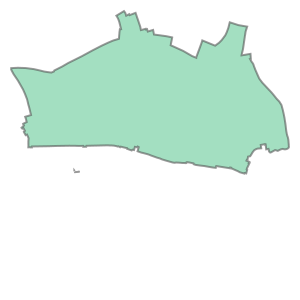

In [27]:
city_london_uu = city_ldn['geometry'].unary_union
city_london_uu

### <a id='Clip stations within city of london'>Clip stations within city of london<a/>
<img  height="100" src="clip.png">
When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. (Image Source: ESRI)

We can do the `clip` operation by `intersects`: We firstly use the above created unified polygon **city_london_uu** to represent City of London area covered by clip layer. Next we can use the `intersects` method to select just the points within the stations object that fall within the geometry in **city_london_uu** object. It will return a boolean mask for every point and further subset the stations object.

In [28]:
stations_clip = new_stations[new_stations.geometry.intersects(city_london_uu)]
stations_clip.head()

,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y,geometry
5,6,84,Aldgate,533613,181262,"Metropolitan, Circle",London Underground,1,-0.074236,51.513982,POINT (533726.539 181208.479)
20,35,47,Bank,532710,181120,"Waterloo & City, Northern, Central",London Underground,1,-0.087297,51.512915,POINT (532823.429 181066.068)
21,67,473,BANK - DLR,532709,181114,None,DLR,1,-0.087317,51.512862,POINT (532822.222 181060.134)
22,9,87,Barbican,532004,181856,"Metropolitan, Circle, Hammersmith & City",London Underground,1,-0.097190,51.519699,POINT (532117.391 181802.587)
40,1,79,Blackfriars,531694,180893,"District, Circle",London Underground,1,-0.102020,51.511114,POINT (531807.023 180839.233)


### <a id='Clip railways within City of London'>Clip railways within City of London<a/>

In [162]:
spatial_index = new_railways.sindex
# Create a box for the initial intersection
bbox = city_london_uu.bounds
# Get a list of railway polylines that overlap the bounding box and subset the data to just those lines
sidx = list(spatial_index.intersection(bbox))
rail_sub = new_railways.iloc[sidx]

# Clip the data - with these data
railways_clip = rail_sub.copy()
railways_clip['geometry'] = rail_sub.intersection(city_london_uu)

# Return the clipped layer with no null geometry values
railways_clip[railways_clip.geometry.notnull()]

,osm_id,code,fclass,geometry
name,,,,
Central Line - Westbound,571633912,6103,subway,"LINESTRING (533392.100 181970.554, 533193.729 ..."
Central Line - Eastbound,571633911,6103,subway,"LINESTRING (533183.946 181734.587, 533391.539 ..."
"Circle, Hammersmith & City and Metropolitan lines",355004980,6103,subway,"LINESTRING (532697.193 181654.627, 532710.779 ..."
"Circle, Hammersmith & City and Metropolitan lines",428585128,6103,subway,"LINESTRING (532588.083 181679.398, 532595.280 ..."
Thameslink,17521901,6101,rail,"LINESTRING (531659.076 181566.530, 531636.299 ..."
...,...,...,...,...
South Eastern Main Line,622994249,6101,rail,GEOMETRYCOLLECTION EMPTY
Northern Line (Bank Branch),139434393,6103,subway,GEOMETRYCOLLECTION EMPTY
District Line,90331174,6103,subway,GEOMETRYCOLLECTION EMPTY


There are 286 segments of railways fall in City of London as shown. So let's plot the stations and railways within City of London together for a view.
### <a id="Task 9">Task 9<a/>
Recall you plotting skillks acquired before, plot three layers on stations, railways and LSOAs for City of London together. 

**Hint**: assign color 'grey' for railways, 'yellow' for stations, and edgecolor 'red', facecolor 'lightblue' for lsoas. Legend should be present, and be careful about your axis setting. 

In [179]:
# your code here
ax = city_london.plot(edgecolor='lightblue', facecolor='none', figsize=(10, 8))
railways_clip.plot(ax=ax, color='grey')
stations_clip.plot(ax=ax, color='yellow', alpha=0.5)
ax.set(xlim=(530000, 535000), ylim=(180000, 183000))

Here we go, let's check the containment of defined stations $p2$ and $p3$ in the city of london boundary.

In [168]:
p2.within(city_london_uu) # Holborn station

False

In [170]:
city_london_uu.contains(p3) # Bank station

True

As you may find Holborn station is not in City of London, but how far is it away from the area? and one step further, will a 1000 meters' buffer zone of Holborn station happened to overlap City of London somehow? Let's try practice our techniques acquired before. 

In [171]:
# your code here
p2.distance(city_london_uu)

363.92474064001243

In [175]:
# your code here
poly_1000=p2.buffer(1000)
poly_1000.intersects(city_london_uu)

True

### ! (Optional) Other realization of clipping :
If time permits, you may want to try other two ways to clip the railways in City of London: 

(1) use **lambdas**

(2) use loop.

In [29]:
r = new_railways['geometry']
rc_routes = r[r.apply(lambda x: x.intersects(city_london.iloc[0]['geometry']))]
rc_routes.plot()

In [177]:
rc_routes.shape

(221,)

In [178]:
ax = plt.gca()
rc_routes.plot(ax=ax, edgecolor='grey')
city_london.plot(ax=ax, color='lightblue')
plt.show()

How do you think? **Lambdas** are handy, but tend to be a bit more difficult to read as \"anonymous functions\". So let's try another more \"transparent\" approach by using a simple loop. The rationale is to test the intersection between each railway segment and City of London, if the result returns to be true, then append the segment to a list and store the list of final segments intersecting with City of London.

In [30]:
rails = [] # create an empty list for further storage
for ids, route in enumerate(rc_routes):
    # print(ids)
    rails.append(route.intersection(city_london.iloc[0]['geometry']))
# use list of intersection segments above into a GeoSeries:
rc_l = gpd.GeoSeries(rails)

In [181]:
plt.rcParams['figure.figsize'] = (10, 8)
ax = plt.gca()
city_london.plot(ax=ax, color='lightblue')
rc_l.plot(ax=ax, edgecolor='grey')
ax.set_xlim(530900, 533900); ax.set_ylim(180500, 182200)
ax.set_aspect('equal')
plt.show()

In [182]:
type(rc_l)

geopandas.geoseries.GeoSeries

In [31]:
rc_l = gpd.GeoDataFrame({'geometry': rc_l})

In [184]:
rc_l.shape

(221, 1)

In [185]:
city_ldn.shape

(6, 67)

The output is more tidy than **lambada** method, and you may be interested to check the spatial relationships between rc_l and city_london then, feel free to write your own codes. 

**Hint**: `contains`, `crosses` and `touches`.

In [32]:
city_london[city_london.contains(rc_l)]

,geometry,objectid,lsoa11cd,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,...,OutScore,OutRank,OutDec,TotScore,TotRank,TotDec,DepChi,Pop16_59,Pop60_,WorkPop
dummy,,,,,,,,,,,,,,,,,,,,,
1.0,"MULTIPOLYGON (((531627.056 180537.069, 531627....",1,E01000001,City of London 001A,133320.768872,2291.846072,29199,9,City of London 001A,E09000001,...,1.503,1615,1,1296,175,656,465,715.0,343907.41983,3682.43942


### <a id='Join the spatial data'>Join the spatial data<a/>

We had introduced you how to join or merge dataframes through functionality provided in Pandas, see [full documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html)；we have seen the notion of spatial relationships between geometry objects: within, contains, intersects, ..., now we are going to transfer attributes from one layer to another based on their spatial relationship by using `geopandas.sjoin` function with following elements:
- The GeoDataFrame to which we want add information
- The GeoDataFrame that contains the information we want to add
- The spatial relationship we want to use to match both datasets ('intersects', 'contains', 'within')
- The type of join: left or inner join

Since the stations and railway network clipped to the extent of City of London have prepared already, let's determine which LSOAs intersect the railway network within City of London. 

In [199]:
# spatial join, lsoas with stations
lsoas_with_stations = gpd.sjoin(city_ldn, stations_clip, op='contains', how='inner')
lsoas_with_stations.head()

,objectid,lsoa11cd,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,IMD_Decile,LSOA01NM,LADcd,LADnm,...,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y
City of London 001A,1,E01000001,City of London 001A,1.333208e+05,2291.846072,29199,9,City of London 001A,E09000001,City of London,...,9,87,Barbican,532004,181856,"Metropolitan, Circle, Hammersmith & City",London Underground,1,-0.097190,51.519699
City of London 001E,4,E01000005,City of London 001E,1.907388e+05,2167.868343,8678,3,City of London 001E,E09000001,City of London,...,6,84,Aldgate,533613,181262,"Metropolitan, Circle",London Underground,1,-0.074236,51.513982
City of London 001E,4,E01000005,City of London 001E,1.907388e+05,2167.868343,8678,3,City of London 001E,E09000001,City of London,...,66,470,Tower Gateway,533706,180834,None,DLR,1,-0.073062,51.510110
City of London 001F,31921,E01032739,City of London 001F,1.658496e+06,7441.243976,20391,7,City of London 001F,E09000001,City of London,...,1,79,Blackfriars,531694,180893,"District, Circle",London Underground,1,-0.102020,51.511114
City of London 001F,31921,E01032739,City of London 001F,1.658496e+06,7441.243976,20391,7,City of London 001F,E09000001,City of London,...,39,51,St. Paul's,532108,181274,Central,London Underground,1,-0.095908,51.514443


If we scroll to the right of the DataFrame output, we see a column labeled "index_right". The values in this column indicate the index of the features in the right DataFrame (in our case the stations) within the feature in the current row of the left DataFrame (the lsoas).

You may noticed that spatial join operation doesn't change the geometries. In another word, we are not joining respective geometries, but joining attributes based on a spatial relationship between the geometries. This means that the geometries need to at least overlap partially.

In [200]:
lsoas_with_stations.shape # check the number of rows and columns

(15, 78)

As usual, we need to further clean our joined data by dropping some useless columns, and further check the **crs** for all relevant layers.

In [201]:
a=lsoas_with_stations.drop(['objectid', 'st_lengths', 'LSOA01NM', 'LADcd', 'LADnm', 'FID', 'OBJECTID', 'dummy',
       'index_right'], axis=1)
a.crs

{'init': 'epsg:27700'}

In [202]:
city_ldn.crs

{'init': 'epsg:27700'}

In [204]:
rc_l.crs

You are not wrong! It should be blank, as the railway DataFrame does not have a **crs**. To correct this, we need to set it to that of the city_ldn dataframe:

In [33]:
rc_l.crs = city_ldn.crs # create a crs for the rc_l
rc_l = rc_l.to_crs(city_ldn.crs) # update the coordinates accordingly

All prepared, and let's join!

In [206]:
# spatial join again
lsoas_with_stations_railways = gpd.sjoin(a, rc_l, how='inner', op='intersects')
lsoas_with_stations_railways

,lsoa11cd,lsoa11nmw,st_areasha,IMD_Rand,IMD_Decile,IMDScore,IMDRank0,IMDDec0,IncScore,IncRank,...,geometry,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y,index_right
City of London 001A,E01000001,City of London 001A,133320.768872,29199,9,6.208,29199,9,0.007,32831,...,"POLYGON ((532095.563 181577.351, 532095.125 18...",Barbican,532004,181856,"Metropolitan, Circle, Hammersmith & City",London Underground,1,-0.097190,51.519699,129
City of London 001A,E01000001,City of London 001A,133320.768872,29199,9,6.208,29199,9,0.007,32831,...,"POLYGON ((532095.563 181577.351, 532095.125 18...",Barbican,532004,181856,"Metropolitan, Circle, Hammersmith & City",London Underground,1,-0.097190,51.519699,7
City of London 001A,E01000001,City of London 001A,133320.768872,29199,9,6.208,29199,9,0.007,32831,...,"POLYGON ((532095.563 181577.351, 532095.125 18...",Barbican,532004,181856,"Metropolitan, Circle, Hammersmith & City",London Underground,1,-0.097190,51.519699,76
City of London 001G,E01032740,City of London 001G,639349.313830,18089,6,15.841,18089,6,0.024,31774,...,"POLYGON ((531626.061 180803.860, 531624.051 18...",Chancery Lane,531124,181615,Central,London Underground,1,-0.109961,51.517740,76
City of London 001A,E01000001,City of London 001A,133320.768872,29199,9,6.208,29199,9,0.007,32831,...,"POLYGON ((532095.563 181577.351, 532095.125 18...",Barbican,532004,181856,"Metropolitan, Circle, Hammersmith & City",London Underground,1,-0.097190,51.519699,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City of London 001G,E01032740,City of London 001G,639349.313830,18089,6,15.841,18089,6,0.024,31774,...,"POLYGON ((531626.061 180803.860, 531624.051 18...",Chancery Lane,531124,181615,Central,London Underground,1,-0.109961,51.517740,65
City of London 001G,E01032740,City of London 001G,639349.313830,18089,6,15.841,18089,6,0.024,31774,...,"POLYGON ((531626.061 180803.860, 531624.051 18...",Chancery Lane,531124,181615,Central,London Underground,1,-0.109961,51.517740,5
City of London 001G,E01032740,City of London 001G,639349.313830,18089,6,15.841,18089,6,0.024,31774,...,"POLYGON ((531626.061 180803.860, 531624.051 18...",Chancery Lane,531124,181615,Central,London Underground,1,-0.109961,51.517740,37
City of London 001G,E01032740,City of London 001G,639349.313830,18089,6,15.841,18089,6,0.024,31774,...,"POLYGON ((531626.061 180803.860, 531624.051 18...",Chancery Lane,531124,181615,Central,London Underground,1,-0.109961,51.517740,77


In [207]:
# shape for joined data with lsoa, railways and stations in City of London
lsoas_with_stations_railways.shape

(1835, 70)

So far, three layers had joined together, and you may want to save it into shapefile data for further use. Please do as you wish if interested.

In [208]:
plt.rcParams['figure.figsize'] = (10, 8)
ax = plt.gca()
lsoas_with_stations_railways.plot(ax=ax, color='lightblue')
ax.set_xlim(530900, 533900); ax.set_ylim(180500, 182200)
ax.set_aspect('equal')
plt.show()

Besides of spatial analysis, we also should be acknowledged with aspatial analysis, especially the regression analysis, for our project and coursework. So we are going to use the familiar London Airbnb listing data for this section, to analyze the relationships between Airbnb listing price and multiple inflential factors; it will also help us to prepare well for spatial regression analysis next week. 
# <a id='Aspatial Multivariate Regression'>Aspatial Multivariate Regression</a>
To realize aspatial multivariate regression, we need call `spreg` from `pysal`. We are going to use 3 datasets: besides of the **airbnb data** we've used in previous practicals, the **shapefile data for London LSOAs** will be utilized as geographical units, and we add a new dataset **House Prices in London (Year ending December 2017)** [Tackling London's housing crisis](https://www.london.gov.uk/what-we-do/housing-and-land/tackling-londons-housing-crisis) (If you want more housing price data since 1995, it is also available from London Datastore).

In [34]:
import pysal as ps
from pysal.model.spreg import ols

import seaborn as sns
sns.set(style="whitegrid")

### <a id='Get data prepared'>Get data prepared<a/>
Copy your airbnb listings data into this week's "data" folder, download the other two datasets from CUSP London Github as usual.

In [10]:
# Configure the download
url  = 'https://github.com/cusp-london/Spatial-Data-Analysis/blob/master/housing_in_london.csv?raw=true'
path = os.path.join("data","housing_in_london.csv")

# Download
r    = urllib.request.urlretrieve(url, path)

In [35]:
# read the airbnb listings data, copy from previous weeks
df0=pd.read_csv('data/airbnb_listings.csv')
print("Data frame shape: " + str(df0.shape)) # What is the shape of the data?

geometry = [Point(xy) for xy in zip(df0.longitude, df0.latitude)]
df0.drop(['longitude', 'latitude'], axis=1, inplace=True)
crs = {'init': 'epsg:4326'}
airbnb = gpd.GeoDataFrame(df0, crs=crs, geometry=geometry)
airbnb = airbnb.to_crs({'init': 'epsg:27700'})
airbnb.plot()
del(df0)

Join Airbnb data with LSOAs by spatial join.

In [36]:
df = gpd.sjoin(airbnb, lsoas, how="inner", op='within')
# df = df[df.columns[0:30]]

In [37]:
df['Multiple Location Host'] = df.calculated_host_listings_count >= 3
df.drop(['objectid', 'st_lengths', 'LSOA01NM', 'LADcd', 'LADnm', 'IMDRank0', 'IMDDec0', 
         'index_right','geometry',
         'id','name', 'host_id', 'host_name','neighbourhood',
         'last_review','calculated_host_listings_count',
         'reviews_per_month', 'availability_365'
        ], axis=1, inplace=True)

In [38]:
df['price'].fillna('$0')
df['price'] = [(w.split('$')[1]).replace(',','') for w in df['price']]
df['price'] = df['price'].astype(float)

In [39]:
df1=pd.read_csv('data/housing_in_london.csv')
df1.head()

,Code,Area,Year,Value,Measure
0,E01000001,City of London 001A,Year ending Dec 2017,1204928.0,Mean
1,E01000002,City of London 001B,Year ending Dec 2017,991549.0,Mean
2,E01000003,City of London 001C,Year ending Dec 2017,913007.0,Mean
3,E01000005,City of London 001E,Year ending Dec 2017,NaN,Mean
4,E01000006,Barking and Dagenham 016A,Year ending Dec 2017,354300.0,Mean


### Price data

In [40]:
df.columns.values

array(['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_url', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_pr

In [41]:
f = {'price':['mean']}
airbnbg = df.groupby(['lsoa11cd']).agg(f)
airbnbg = airbnbg.price.reset_index().set_index('lsoa11cd').rename(columns=lambda x: x.title() + " Price")
lsoa_new = pd.merge(lsoas, airbnbg, how='left', left_on='lsoa11cd', right_index=True)

In [42]:
airbnbg = df[['lsoa11cd','Multiple Location Host']].groupby(['lsoa11cd','Multiple Location Host']).size().reset_index(name='counts')
airbnbg = airbnbg.pivot(index='lsoa11cd', columns='Multiple Location Host', values='counts').fillna(0).rename(columns = {True:'Multiple Location Host', False:'Small Host'})
lsoa = pd.merge(lsoa_new, airbnbg, how='left', left_on='lsoa11cd', right_index=True)
lsoa['Property Count'] = lsoa['Multiple Location Host'] + lsoa['Small Host']

In this case, the airbnbs have been grouped by LSOAs, with some newly created variables on: the mean price of Airbnbs in each LSOA, the total number of properties in each LSOA, etc.

check the information on **lsoa**, you may find varied number of entries for columns. For example, variables from LSOA_IMD2019 have 4946 rows, whilst variables from Airbnb summarization have 4467 rows.

Dataset 1 is ready, and now let's have a look of dataset 2.

In [43]:
# read the london housing data and have a look
df2=pd.read_csv('data/housing_in_london.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 5 columns):
Code       4835 non-null object
Area       4835 non-null object
Year       4835 non-null object
Value      4543 non-null float64
Measure    4835 non-null object
dtypes: float64(1), object(4)
memory usage: 189.0+ KB


As we will use **'Value'** (average house price) for further analysis, we need to guarantee the data type is numeric.

The column "code" in df2 is actually the same with "lsoa11cd" in lsoa, so we can try to join these two datasets by the shared column.

In [44]:
# Join these two datasets
db=df2.join(lsoa.set_index(['lsoa11cd']), on=['Code'], how='left')
db.shape

(4835, 74)

Delete the rows with missing values by calling **dropna** function.

In [45]:
db_new=db.dropna()

Now we will further change this newly generated asaptial dataset (if you check the data type, it should be dataframe), and save it as shapefile just in our usual way. This spatial data will be further used next week to realize spatial regression.

In [46]:
db_geo = gpd.GeoDataFrame(db_new, geometry='geometry')
db_geo.to_file(driver='ESRI Shapefile', filename='data/lsoa_IMD_airbnb_housing.shp')

In [47]:
gdf=gpd.read_file('data/lsoa_IMD_airbnb_housing.shp')
gdf.head()

,Code,Area,Year,Value,Measure,objectid,lsoa11nmw,st_areasha,st_lengths,IMD_Rand,...,TotDec,DepChi,Pop16_59,Pop60_,WorkPop,Mean Price,Small Host,Multiple L,Property C,geometry
0,E01000001,City of London 001A,Year ending Dec 2017,1204928.0,Mean,1,City of London 001A,133320.768872,2291.846072,29199,...,656,465,715.00,343907.419830,3682.439420,148.444444,8.0,10.0,18.0,"POLYGON ((532095.563 181577.351, 532095.125 18..."
1,E01000002,City of London 001B,Year ending Dec 2017,991549.0,Mean,2,City of London 001B,226191.272990,2433.960112,30379,...,580,394,619.75,583474.041779,3910.387240,200.400000,8.0,2.0,10.0,"POLYGON ((532267.728 181643.781, 532262.875 18..."
2,E01000003,City of London 001C,Year ending Dec 2017,913007.0,Mean,3,City of London 001C,57302.966538,1142.359799,14915,...,759,445,804.00,147839.506081,1834.931320,139.428571,5.0,2.0,7.0,"POLYGON ((532105.312 182010.574, 532104.872 18..."
3,E01000006,Barking and Dagenham 016A,Year ending Dec 2017,354300.0,Mean,5,Barking and Dagenham 016A,144195.846857,1935.510354,14486,...,1297,221,1284.50,372257.321186,3108.610781,44.200000,5.0,0.0,5.0,"POLYGON ((544817.826 184346.261, 544815.791 18..."
4,E01000007,Barking and Dagenham 015A,Year ending Dec 2017,230380.0,Mean,6,Barking and Dagenham 015A,198134.809244,2824.036914,7256,...,1424,105,1404.00,511543.283051,4537.675635,62.000000,10.0,4.0,14.0,"POLYGON ((544175.331 184526.180, 544175.880 18..."


In [60]:
db_new.columns.values

array(['Code', 'Area', 'Year', 'Value', 'Measure', 'objectid', 'lsoa11nm',
       'lsoa11nmw', 'st_areasha', 'st_lengths', 'IMD_Rand', 'IMD_Decile',
       'LSOA01NM', 'LADcd', 'LADnm', 'IMDScore', 'IMDRank0', 'IMDDec0',
       'IncScore', 'IncRank', 'IncDec', 'EmpScore', 'EmpRank', 'EmpDec',
       'EduScore', 'EduRank', 'EduDec', 'HDDScore', 'HDDRank', 'HDDDec',
       'CriScore', 'CriRank', 'CriDec', 'BHSScore', 'BHSRank', 'BHSDec',
       'EnvScore', 'EnvRank', 'EnvDec', 'IDCScore', 'IDCRank', 'IDCDec',
       'IDOScore', 'IDORank', 'IDODec', 'CYPScore', 'CYPRank', 'CYPDec',
       'ASScore', 'ASRank', 'ASDec', 'GBScore', 'GBRank', 'GBDec',
       'WBScore', 'WBRank', 'WBDec', 'IndScore', 'IndRank', 'IndDec',
       'OutScore', 'OutRank', 'OutDec', 'TotScore', 'TotRank', 'TotDec',
       'DepChi', 'Pop16_59', 'Pop60_', 'WorkPop', 'geometry',
       'Mean Price', 'Small Host', 'Multiple Location Host',
       'Property Count'], dtype=object)

### <a id='Multivariate Regression'>Multivariate Regression</a>
    
We will use `PySAL` to analyse the relations between `Airbnb listing price` , `deprivation indices` and other housing and earning variables by LSOA in London. Before introducing explicitly spatial methods next week, we will run a simple ordinary least squares (OLS) linear regression model to analyze the relationship between these variables. Hence providing us the capability to interpret regression results on which the spatial models will build on; and enabling us to evaluate the meaningfulness of spatial regression models upon comparions. 

Normally, an OLS linear regression is to explain a given variable $y$, as a linear function of a set of other variables $X$:

$y_i$=α+β$X_i$+$ϵ_i$

where $i$ is the boroughs in our example, and $\epsilon_i$ is the error term for our probabilistic model. 

Now let's start with read in the dependent variable $y$ and independent variables $X$:

We will start directly with more than 6 independant variables for today, but if in your own project, the X is a 2 dimensional array, which means only 2 independant variables, then the ordinary least squares (OLS) regression is performed with [pysal.model.spreg](https://pysal.readthedocs.io/en/latest/generated/pysal.model.spreg.OLS.html), with outputs callable through its `summary` feature and I leave more to explore by yourself. 

In [63]:
# read the .dbf file from your shapefile data
f = ps.lib.io.open('data/lsoa_IMD_airbnb_housing.dbf','r')
# Read in the listing_price (dependent variable) into an array y
y = np.array(f.by_col['Mean Price']) # airbnb average price in each lsoa
y.shape = (len(y),1)
# value for independent variables into a one dimmensional array X. 
# You can feel free to change the independant variables
X= []
X.append(f.by_col['Value']) # average house price
X.append(f.by_col['IncScore']) # Income score in 2019
X.append(f.by_col['EduScore']) # Education score in 2019
X.append(f.by_col['BHSScore']) # Barrier to Housing Services score in 2019
X.append(f.by_col['IMDScore']) # Deprivation index in 2019
X.append(f.by_col['Property C']) # number of airbnbs
X = np.array(X).T

In [64]:
m1 = ps.model.spreg.OLS(y, X, name_y = 'Mean Price', 
                        name_x = ['Value', 'IncScore', 'EduScore', 'BHSScore', 'IMDScore', 'Property C'], 
                        name_ds = 'lsoa_IMD_airbnb_housing')
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :lsoa_IMD_airbnb_housing
Weights matrix      :        None
Dependent Variable  :  Mean Price                Number of Observations:        4201
Mean dependent var  :     87.6544                Number of Variables   :           7
S.D. dependent var  :     71.2100                Degrees of Freedom    :        4194
R-squared           :      0.2850
Adjusted R-squared  :      0.2840
Sum squared residual:15227770.305                F-statistic           :    278.6251
Sigma-square        :    3630.847                Prob(F-statistic)     :  5.379e-301
S.E. of regression  :      60.257                Log likelihood        :  -23175.721
Sigma-square ML     :    3624.797                Akaike info criterion :   46365.442
S.E of regression ML:     60.2063                Schwarz criterion     :   46409.843

------------------------------------------------------------------

### <a id="Task 10">Task 10<a/>
Interpret the regression summary, and get your answers to:
- Is current OLS model well enough? What is the adjusted R-squared value and how to interpret it?
- Which variable(s) have significant influence on airbnb listing price, and how they are going to affect the pricing?
- Which are the parameters telling us the model fit?
- Is multicollinearity existing? If so, do you have better solutions? If you are going to replace some variables for improvement, which variables will be considered?

However, you may already found this method is not good enough! We call the array by using pysal wrapper $f$, so we can only define **X** with the original cutted labels for variables, which is not easy to interpret. How if we want to keep using the geodataframe to do the regression? We can use `statsmodels` (you've seen it last week in optional section) to realize the function.

In [49]:
import statsmodels.api as sm
x = ['Value', 'IncScore', 'EduScore', 'BHSScore', 'IMDScore', 'Property C'] # define input/independant variables
X = gdf.loc[:, x].dropna()
y = np.array(gdf['Mean Price']) # define output/dependant variable
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              1670.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):                        0.00
Time:                        23:45:01   Log-Likelihood:                         -23255.
No. Observations:                4201   AIC:                                  4.652e+04
Df Residuals:                    4195   BIC:                                  4.656e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Value       7.824e-05   1.98e-06     39.496      0.000    7.44e-05    8.21e-05
IncScore      27.5433     44.475      0.619      0.536     -59.651     114.738
EduScore       0.0603      0.161      0.375      0.708      -0.255       0.375
BHSScore       0.8834      0.102      8.665      0.000       0.683       1.083
IMDScore      -0.2338      0.362     -0.647      0.518      -0.943       0.475
Property C     0.4775      0.039     12.135      0.000       0.400       0.555
==============================================================================
Omnibus:                     6901.272   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8541384.438
Skew:                          10.603   Prob(JB):                         0.00
Kurtosis:                     222.879   Cond. No.                     3.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What have you got this time? The output summary is very different from the previous one.

"Ordinary Least Squares (OLS)" method means that we’re trying to fit a regression line that would minimize the square of distance from the regression line. Date and Time are the precise moment you got this summary, Number of observations is the count of rows, and in our dataset it equals to the number of boroughs. $Df$ of residuals and models relates to the degrees of freedom ("number of values in the final calculation of a statistic that are free to vary").

Take the Barriers to House Services Score variable as an example, the coefficient of 0.8833 means that as the Barriers to house services deprivation score in the LSOA increases by 1, the predicted average Airbnb listing price increases by 0.8833 (sterlings). Similar explanations could be made on other coefficients with a signifant $p$ value.

Other important measures include: 

- R-squared: how much percentage of variance the model can explain; 
Std err (standard error): standard deviation of the sampling distribution of a statistic, e.g. mean; 

- t scores and p-values: hypothesis test. If private_rent_price variable has statistically significant p-value; there is a 95% confidence intervals for it.

If we want to add a constant intercept to the model, we can call the following:

In [66]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model_c = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model_c.predict(X)

# Print out the statistics
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     278.6
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          5.38e-301
Time:                        11:39:32   Log-Likelihood:                -23176.
No. Observations:                4201   AIC:                         4.637e+04
Df Residuals:                    4194   BIC:                         4.641e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.3833      4.057     12.665      0.000      43.429      59.337
Value         6.2e-05   2.33e-06     26.620      0.000    5.74e-05    6.66e-05
IncScore    -135.0255     45.502     -2.967      0.003    -224.233     -45.818
EduScore      -0.1285      0.158     -0.811      0.417      -0.439       0.182
BHSScore      -0.3725      0.141     -2.644      0.008      -0.649      -0.096
IMDScore       0.9566      0.367      2.606      0.009       0.237       1.676
Property C     0.4575      0.039     11.836      0.000       0.382       0.533
==============================================================================
Omnibus:                     7104.176   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9710840.058
Skew:                          11.258   Prob(JB):                         0.00
Kurtosis:                     237.458   Cond. No.                     3.82e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With the constant term the coefficients are different now. The previous model without constant term, we forced our model to go through the origin data, but now we have a y-intercept at 51.3833, the slope of the Barriers to House Services index variable also changed from 0.8833 to -0.3725.

The model explanation capability decreased from 70.4% of the variance in dependent variable, airbnb listing price, to 28.4%, reading from the R-squared values of summaries. Think of another scenario, how if we add other variables to this regression model, will the R² get higher? Discuss with your neighbours if you want to share your opinion.

We can see all independent variables are statistically significant in predicting (or estimating) the airbnb listing price. As the barrier to house services deprivation score increases by 1, the airbnb listing price will decrease by 0.3725, which is a reversed relationship, etc.. In all, `Statsmodels` is functionally sufficient to conduct multivariate regression, and you can add up to 13 variables for your research！In addition, it also provide follow-on methods to diagnose your regression result.

### <a id='Regression diagnostics'>Regression diagnostics<a/>

The rationale is to check the normality of the residuals from our model. The meanings of statistics could be googled or discuss with your neighbors in class.

In [50]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
# Omni test
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(model.resid)
lzip(name, test)

[('Chi^2', 6901.2721923939425), ('Two-tail probability', 0.0)]

In [51]:
# Jarque-Bera test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 8541384.437977437),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 10.603056124888507),
 ('Kurtosis', 222.8785885720305)]

In [52]:
# Multicollinearity on condition number
np.linalg.cond(model.model.exog)

36660390.601976335

In [53]:
# Heteroskedasticity tests
# Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 29.03485730324291),
 ('p-value', 2.2825325461680073e-05),
 ('f-value', 4.865861459410169),
 ('f p-value', 5.804188680463761e-05)]

In [54]:
# Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 1.6636994593063101), ('p-value', 2.4477087942196828e-31)]

### <a id='Partial Regression Plots'>Partial Regression Plots<a/>
Partial regression plots show us the relationships between each independent variable and dependent varaiable individually, with a linear fit line added. However, you may find partical regression take natural log transformed data as default variables, the axis is with $ e(X) $ specification, and the scales for axis had changed even with negative values. But for our analysis, we didn't do data transformation beforehand for consistence, hence the axis have changed into Xth power of e. It doesn't affect the result for this practical, we only take it as an additional supportive part, helping you better interpret your regression summary intuitively. 

In [55]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

### <a id='Influence Plots'>Influence Plots<a/>
Influence plots could be used to signify the influences on regression result from each row.

In [56]:
# visualize the influence from each borough
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(model, ax=ax)

In [58]:
# Influence tests
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model)
test_class.dfbetas[:5,:]

array([[ 4.85267059e-03, -4.57757803e-03, -8.64066358e-04,
         5.12957799e-03,  1.64965568e-03, -2.01044514e-03],
       [ 2.02155330e-02,  1.36964797e-02, -4.61325175e-03,
         2.67913791e-02, -2.05984659e-02, -6.68594513e-03],
       [ 2.90123518e-03, -1.11168534e-02, -7.24760399e-03,
         4.54775539e-03,  9.98347781e-03, -8.46972014e-03],
       [ 5.29252431e-03, -4.40145938e-05, -2.54337499e-03,
        -1.22944440e-02,  4.10465373e-03, -2.49270808e-04],
       [ 2.04455902e-03, -7.45197793e-04,  2.30787534e-03,
        -2.08644616e-03,  2.44454581e-04,  4.05980785e-04]])

It will return a ndarray ($m*n$), where $m$ is the number you defined (here we give 5, but you may change it by yourself), $n$ is the number of independent variables (6 for our model), the value is studentized residuals.

### <a id='Leverage-Resid2 Plot'>Leverage-Resid2 Plot</a>
Closely related to the influence_plot is the leverage-resid2 plot. Let's have a look of the leverage plot first. In order to interpret the diagnostic plot better, you are encourage to explore the [leverage](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html).

In [59]:
fig = sm.graphics.plot_leverage_resid2(model, ax=ax)

The plot_regress_exog function is a convenience function that gives a 2x2 plot containing the dependent variable and fitted values with confidence intervals vs. the independent variable chosen, the residuals of the model vs. the chosen independent variable, a partial regression plot, and a CCPR plot. This function can be used for quickly checking modeling assumptions with respect to a single regressor. Let's take the most significant variable "Value" as an example:

In [60]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Value', fig=fig)

The plot_fit function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "Value", ax=ax)

More functions to explore from `statsmodel` at http://www.statsmodels.org/stable/index.html.

## Credits!

#### Contributors:
The following individual(s) have contributed to these teaching materials: Yijing Li (yijing.li@kcl.ac.uk).

#### License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).